# Loading the dataframe


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pokemon = pd.read_csv("pokemon.csv")
pokemon = pokemon.rename(index=str, columns={"#": "Number"})
pokemon.head(10)

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


# Cleaning up the dataset

In [3]:
pokemon.columns = pokemon.columns.str.upper()
pokemon.head()

,NUMBER,NAME,TYPE 1,TYPE 2,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [4]:
print(f"Dimensions of pokemon: {pokemon.shape}")

Dimensions of pokemon: (800, 12)


In [5]:
pokemon = pokemon.set_index('NAME')
pokemon.head()

,NUMBER,TYPE 1,TYPE 2,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,80,82,83,100,100,80,1,False
Mega Venusaur,4,Grass,Poison,80,100,123,122,120,80,1,False
Charmander,5,Fire,NaN,39,52,43,60,50,65,1,False


In [6]:
pokemon = pokemon.drop(['NUMBER'], axis=1)
pokemon.head()

,TYPE 1,TYPE 2,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,
Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [7]:
print("Dataset columns:", pokemon.columns)

Dataset columns: Index(['TYPE 1', 'TYPE 2', 'HP', 'ATTACK', 'DEFENSE', 'SP. ATK', 'SP. DEF',
       'SPEED', 'GENERATION', 'LEGENDARY'],
      dtype='object')


# Queries

In [8]:
print(pokemon.loc['Bulbasaur'])

TYPE 1         Grass
TYPE 2        Poison
HP                45
ATTACK            49
DEFENSE           49
SP. ATK           65
SP. DEF           65
SPEED             45
GENERATION         1
LEGENDARY      False
Name: Bulbasaur, dtype: object


In [9]:
pokemon[pokemon['LEGENDARY']==True].head(10)

,TYPE 1,TYPE 2,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,
Articuno,Ice,Flying,90,85,100,95,125,85,1,True
Zapdos,Electric,Flying,90,90,85,125,90,100,1,True
Moltres,Fire,Flying,90,100,90,125,85,90,1,True
Mewtwo,Psychic,NaN,106,110,90,154,90,130,1,True
Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True
Mega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,1,True
Raikou,Electric,NaN,90,85,75,115,100,115,2,True
Entei,Fire,NaN,115,115,85,90,75,100,2,True
Suicune,Water,NaN,100,75,115,90,115,85,2,True


In [10]:
pokemon[(pokemon['TYPE 1']=='Fire') | (pokemon['TYPE 1']=='Dragon')]

,TYPE 1,TYPE 2,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,
Charmander,Fire,NaN,39,52,43,60,50,65,1,False
Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
Charizard,Fire,Flying,78,84,78,109,85,100,1,False
Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
...,...,...,...,...,...,...,...,...,...,...
Goomy,Dragon,NaN,45,50,35,55,75,40,6,False
Sliggoo,Dragon,NaN,68,75,53,83,113,60,6,False
Goodra,Dragon,NaN,90,100,70,110,150,80,6,False


In [11]:
pokemon[((pokemon['TYPE 1']=='Dragon') & (pokemon['TYPE 2']=='Ice'))]

,TYPE 1,TYPE 2,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,
Kyurem,Dragon,Ice,125,130,90,130,90,95,5,True
Kyurem Black Kyurem,Dragon,Ice,125,170,100,120,90,95,5,True
Kyurem White Kyurem,Dragon,Ice,125,120,90,170,100,95,5,True


In [12]:
print(f"Pokemon with the highest HP: {pokemon['HP'].idxmax()} - {pokemon['HP'].max()}")
print(f"Pokemon with the highest defense: {pokemon['DEFENSE'].idxmax()} - {pokemon['DEFENSE'].max()}")
print(f"Pokemon with the highest attack: {pokemon['ATTACK'].idxmax()} - {pokemon['ATTACK'].max()}")

Pokemon with the highest HP: Blissey - 255
Pokemon with the highest defense: Mega Steelix - 230
Pokemon with the highest attack: Mega Mewtwo X - 190


In [38]:
print(f"Pokemon with the lowest HP: {pokemon['HP'].idxmin()} - {pokemon['HP'].min()}")
print(f"Pokemon with the lowest defense: {pokemon['DEFENSE'].idxmin()} - {pokemon['DEFENSE'].min()}")
print(f"Pokemon with the lowest attack: {pokemon['ATTACK'].idxmin()} - {pokemon['ATTACK'].min()}")

Pokemon with the lowest HP: Shedinja - 1
Pokemon with the lowest defense: Chansey - 5
Pokemon with the lowest attack: Chansey - 5


In [13]:
print(f"The {pokemon['TYPE 1'].nunique()} different pokemon types are {pokemon['TYPE 1'].unique()}")

The 18 different pokemon types are ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']


In [14]:
pokemon.groupby(['TYPE 1']).size()

TYPE 1
Bug          69
Dark         31
Dragon       32
Electric     44
Fairy        17
Fighting     27
Fire         52
Flying        4
Ghost        32
Grass        70
Ground       32
Ice          24
Normal       98
Poison       28
Psychic      57
Rock         44
Steel        27
Water       112
dtype: int64

In [15]:
pokemon.groupby(['TYPE 2']).size()

TYPE 2
Bug          3
Dark        20
Dragon      18
Electric     6
Fairy       23
Fighting    26
Fire        12
Flying      97
Ghost       14
Grass       25
Ground      35
Ice         14
Normal       4
Poison      34
Psychic     33
Rock        14
Steel       22
Water       14
dtype: int64

In [16]:
pokemon_stats = pokemon.describe()
pokemon_stats

,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


# Visualising the data

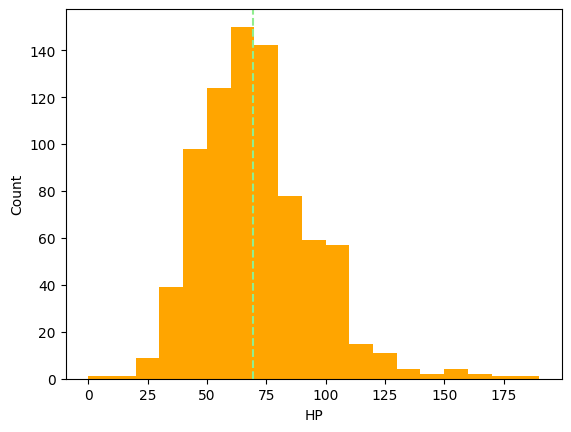

In [17]:
bin = range(0,200,10)
plt.hist(pokemon["HP"], bin, histtype="bar", color='#FFA500')
plt.xlabel('HP')
plt.ylabel('Count')
plt.plot()
plt.axvline(pokemon['HP'].mean(),linestyle='dashed',color='#90EE90')
plt.show()

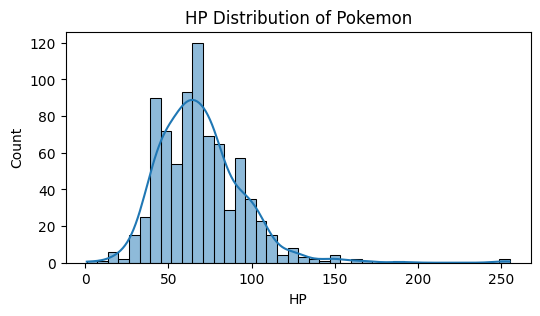

In [18]:
plt.figure(figsize=(6, 3))
plt.title("HP Distribution of Pokemon")
sns.histplot(x='HP', data=pokemon, kde=True)
plt.show()

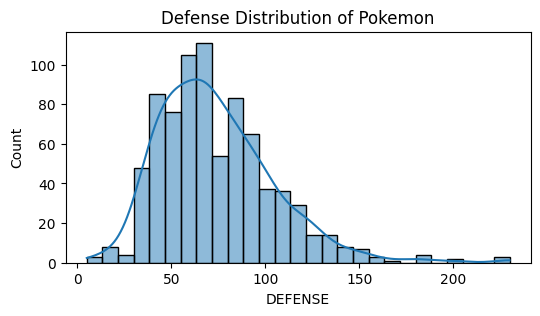

In [19]:
plt.figure(figsize=(6, 3))
plt.title("Defense Distribution of Pokemon")
sns.histplot(x='DEFENSE', data=pokemon, kde=True)
plt.show()

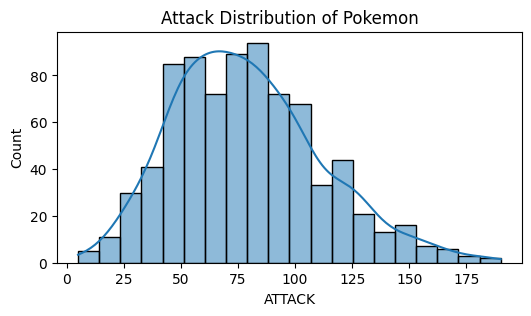

In [20]:
plt.figure(figsize=(6, 3))
plt.title("Attack Distribution of Pokemon")
sns.histplot(x='ATTACK', data=pokemon, kde=True)
plt.show()

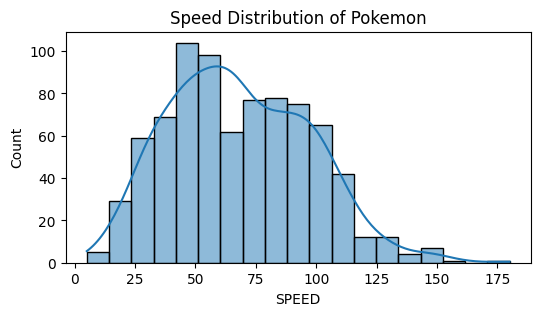

In [21]:
plt.figure(figsize=(6, 3))
plt.title("Speed Distribution of Pokemon")
sns.histplot(x='SPEED', data=pokemon, kde=True)
plt.show()

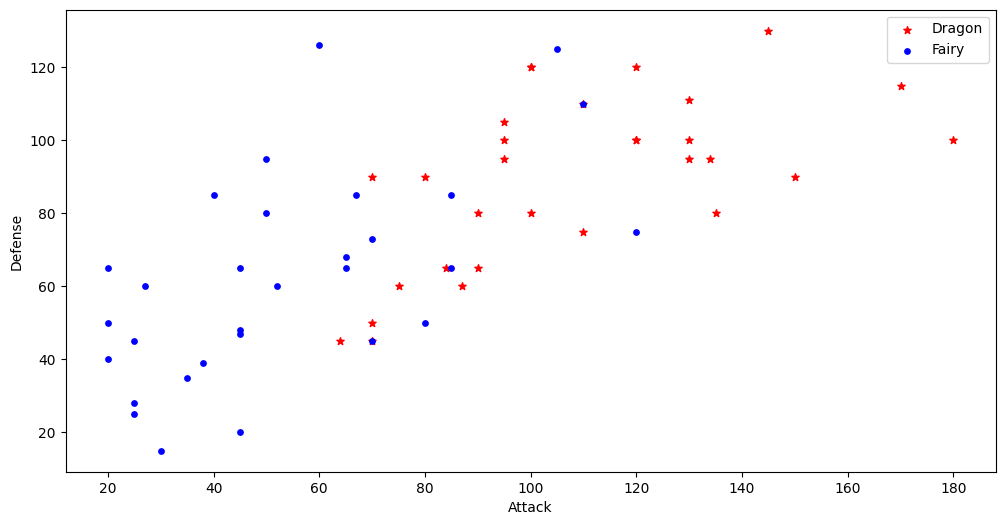

In [22]:
dragon = pokemon[(pokemon['TYPE 1'] == 'Dragon') | (pokemon['TYPE 2'] == 'Dragon')]
fairy = pokemon[(pokemon['TYPE 1'] == 'Fairy') | (pokemon['TYPE 2'] == 'Fairy')]
plt.scatter(dragon.ATTACK.head(30), dragon.DEFENSE.head(30), color='#FF0000', label='Dragon', marker="*", s=30)
plt.scatter(fairy.ATTACK.head(30), fairy.DEFENSE.head(30), color='#0000FF', label='Fairy', s=15)
plt.xlabel("Attack")
plt.ylabel("Defense")
plt.legend()
plt.plot()
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

In [23]:
pokemon['TOTAL'] = pokemon['HP'] + pokemon['ATTACK'] + pokemon['DEFENSE'] + pokemon['SP. ATK'] + pokemon['SP. DEF'] + pokemon['SPEED']
pokemon.head()

,TYPE 1,TYPE 2,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY,TOTAL
NAME,,,,,,,,,,,
Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309


In [24]:
strong_poke = pokemon.sort_values(by='TOTAL', ascending=False)
strong_poke.drop_duplicates(subset=['TYPE 1'], keep='first')

,TYPE 1,TYPE 2,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY,TOTAL
NAME,,,,,,,,,,,
Mega Rayquaza,Dragon,Flying,105,180,100,180,100,115,3,True,780
Mega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,1,True,780
Primal Kyogre,Water,NaN,100,150,90,180,160,90,3,True,770
Primal Groudon,Ground,Fire,100,180,160,150,90,90,3,True,770
Arceus,Normal,NaN,120,120,120,120,120,120,4,True,720
Mega Metagross,Steel,Psychic,80,145,150,105,110,110,3,False,700
Mega Tyranitar,Rock,Dark,100,164,150,95,120,71,2,False,700
Giratina Origin Forme,Ghost,Dragon,150,120,100,120,100,90,4,True,680
Ho-oh,Fire,Flying,106,130,90,110,154,90,2,True,680


In [36]:
strong_poke = pokemon.sort_values(by='TOTAL', ascending=True)
strong_poke.drop_duplicates(subset=['TYPE 1'], keep='first')

,TYPE 1,TYPE 2,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY,TOTAL
NAME,,,,,,,,,,,
Sunkern,Grass,NaN,30,30,30,30,30,30,2,False,180
Azurill,Normal,Fairy,50,20,40,20,40,20,3,False,190
Kricketot,Bug,NaN,37,25,41,25,41,25,4,False,194
Ralts,Psychic,Fairy,28,25,25,45,35,40,3,False,198
Magikarp,Water,NaN,20,10,55,15,20,80,1,False,200
Pichu,Electric,NaN,20,40,15,35,35,60,2,False,205
Tyrogue,Fighting,NaN,35,35,35,35,35,35,2,False,210
Cleffa,Fairy,NaN,50,25,28,45,55,15,2,False,218
Poochyena,Dark,NaN,35,55,35,30,30,35,3,False,220


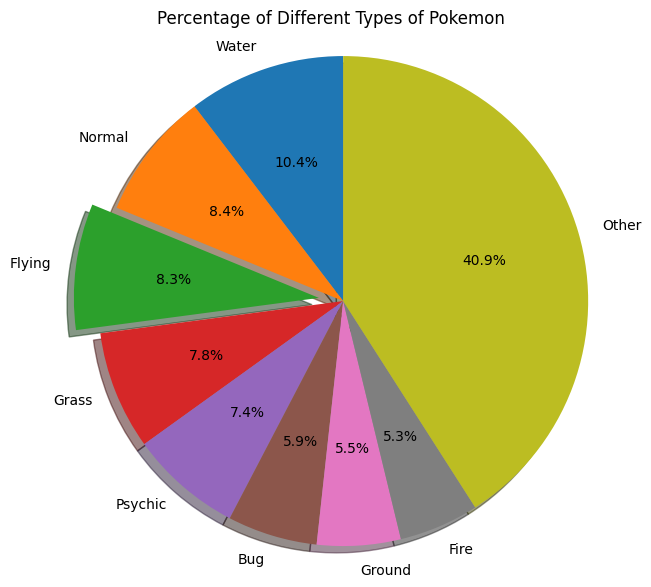

In [25]:
poke_types = pokemon.groupby(['TYPE 1']).size() + pokemon.groupby(['TYPE 2']).size()
sorted_poke_types = poke_types.sort_values(ascending=False)
top_8 = sorted_poke_types.iloc[:8].copy()
remaining_sum = sorted_poke_types.iloc[8:].sum()
labels = []
sizes = []
for label, value in top_8.items():
    labels.append(label)
    sizes.append(value)
labels.append("Other")
sizes.append(remaining_sum)
explode = (0, 0, 0.1, 0, 0, 0, 0, 0, 0) 
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Percentage of Different Types of Pokemon")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.show()

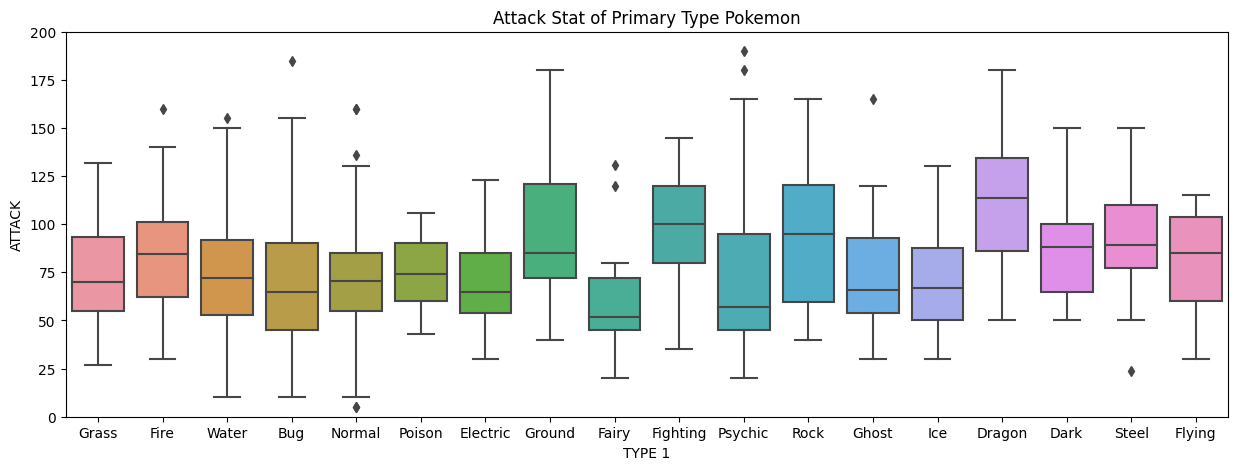

In [26]:
plt.subplots(figsize = (15,5))
plt.title("Attack Stat of Primary Type Pokemon")
sns.boxplot(x = "TYPE 1", y = "ATTACK", data = pokemon)
plt.ylim(0,200)
plt.show()

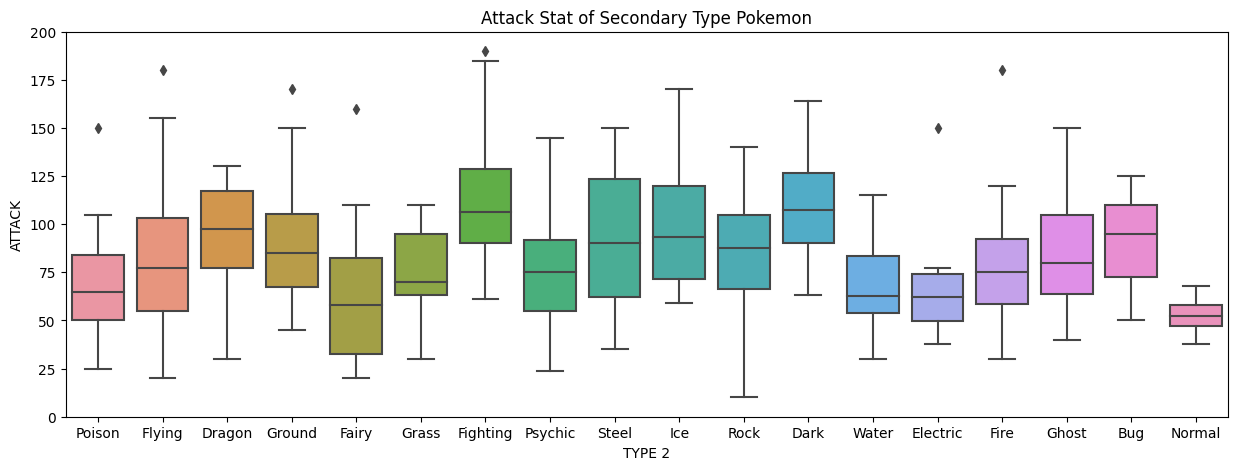

In [27]:
plt.subplots(figsize = (15,5))
plt.title("Attack Stat of Secondary Type Pokemon")
sns.boxplot(x = "TYPE 2", y = "ATTACK", data = pokemon)
plt.ylim(0,200)
plt.show()

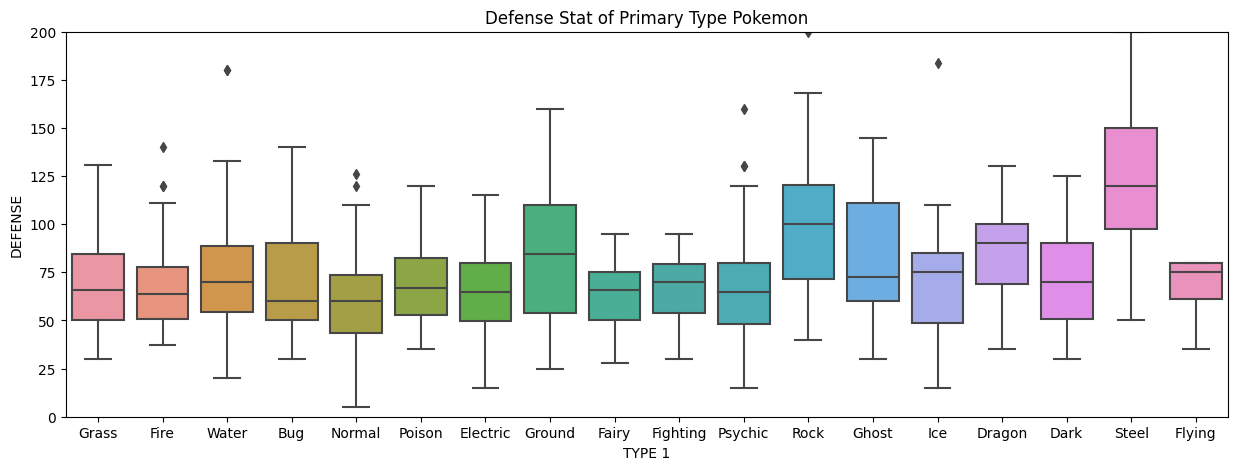

In [28]:
plt.subplots(figsize = (15,5))
plt.title("Defense Stat of Primary Type Pokemon")
sns.boxplot(x = "TYPE 1", y = "DEFENSE", data = pokemon)
plt.ylim(0,200)
plt.show()

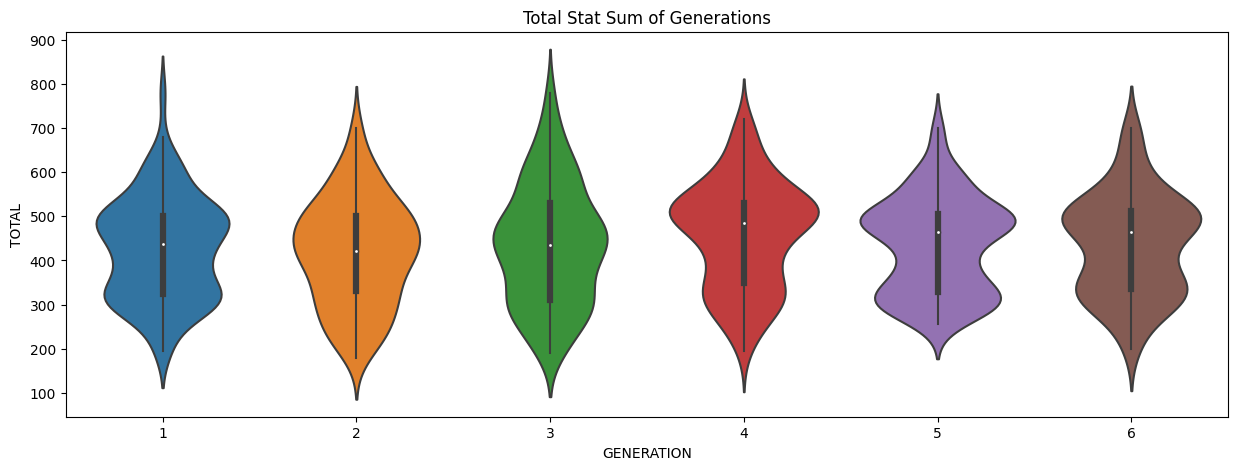

In [29]:
plt.subplots(figsize = (15,5))
plt.title("Total Stat Sum of Generations")
sns.violinplot(x = "GENERATION", y = "TOTAL", data=pokemon)
plt.show()

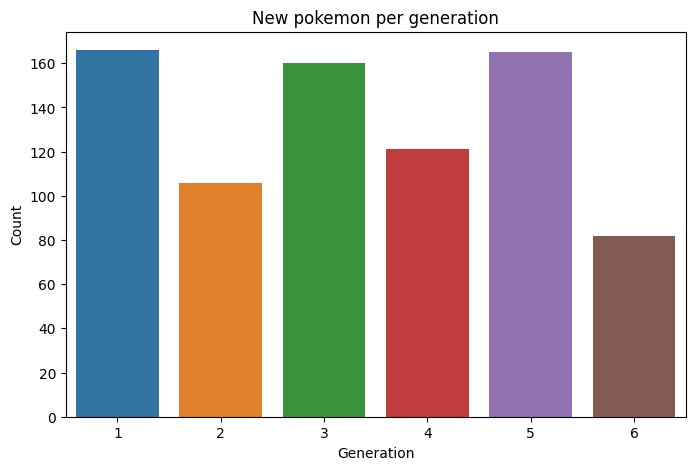

In [30]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x = pokemon['GENERATION'])
ax.set_title("New pokemon per generation")
ax.set(xlabel='Generation', ylabel='Count')
plt.show()

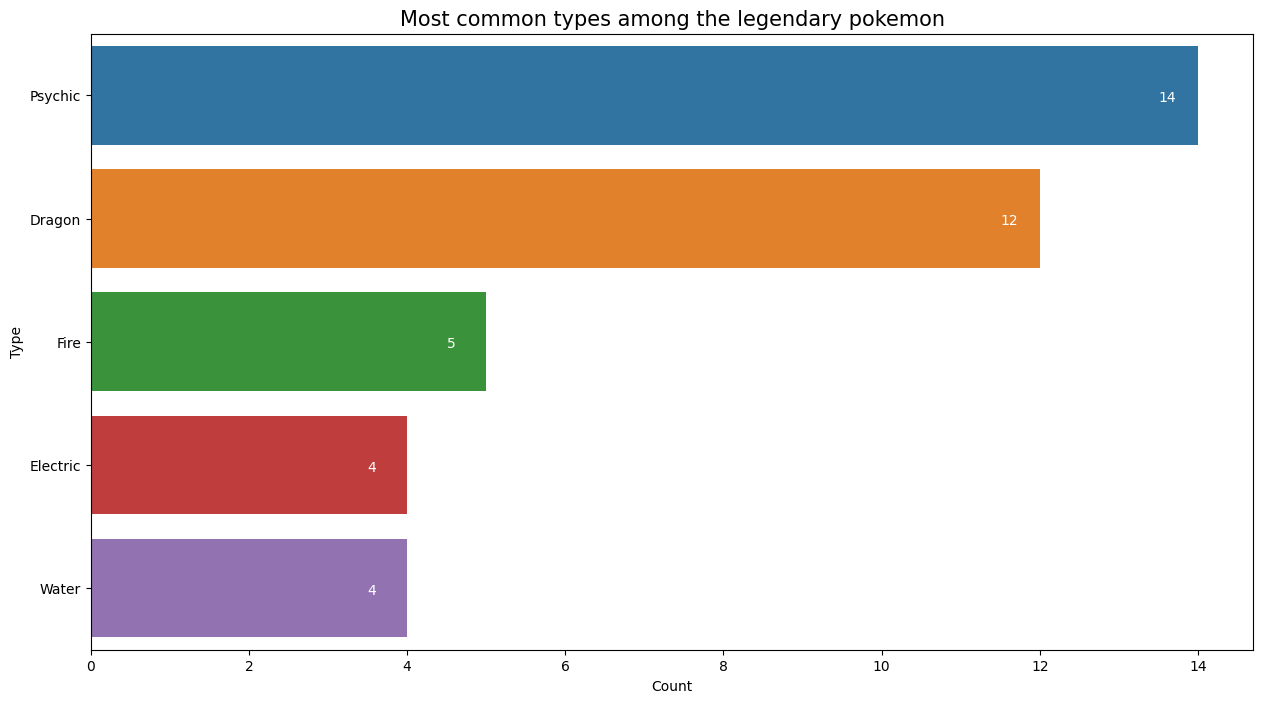

In [31]:
legendary_pokemon = pokemon[pokemon['LEGENDARY'] == True]
legendary_pokemon_types_top5 = legendary_pokemon["TYPE 1"].value_counts()[:5]
plt.figure(figsize=(15,8))
ax = sns.barplot(y=legendary_pokemon_types_top5.index, x=legendary_pokemon_types_top5.values, orient='h')
ax.set_title("Most common types among the legendary pokemon", size=15)
ax.set(xlabel="Count", ylabel="Type")
for index, value in enumerate(legendary_pokemon_types_top5): 
    plt.annotate(value, xy=(value-0.5, index+0.05), color='white')
plt.show()

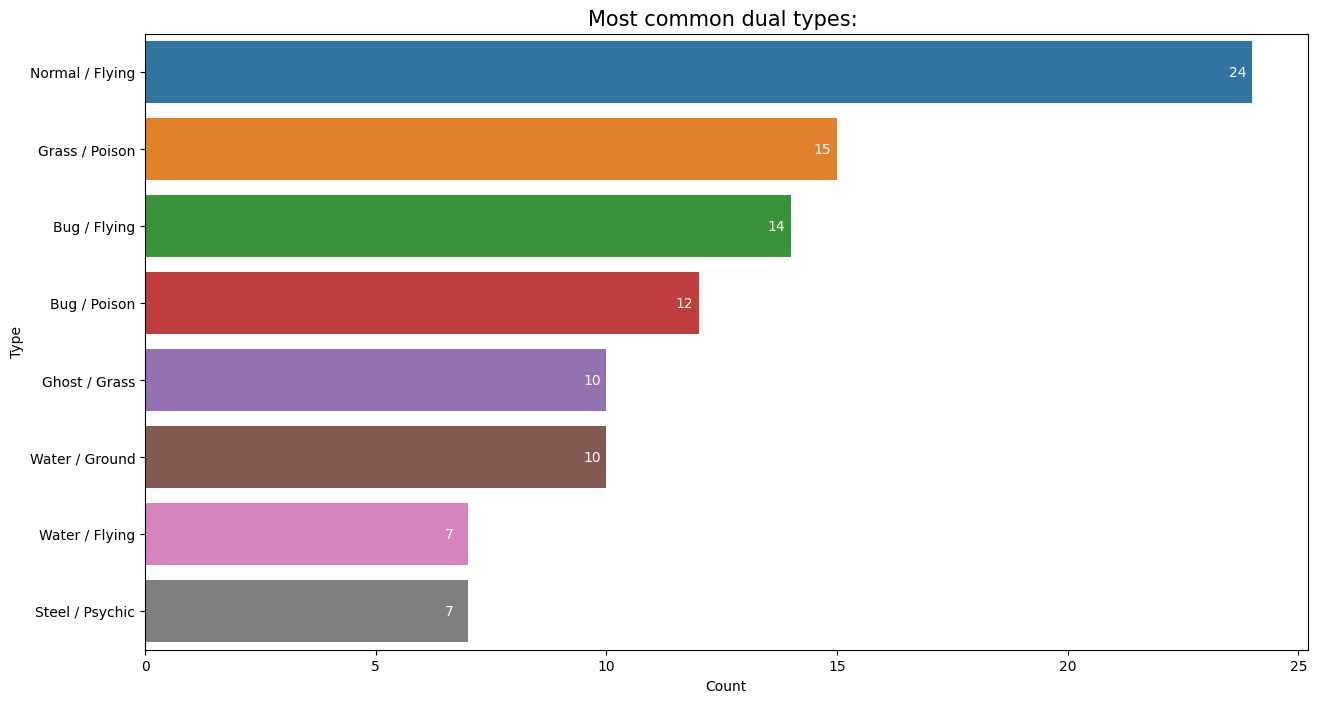

In [32]:
type_combo = pokemon["TYPE 1"] + " / " + pokemon["TYPE 2"]
type_counts = type_combo.value_counts()[:8]

plt.figure(figsize=(15,8))
ax = sns.barplot(y=type_counts.index, x=type_counts.values)
ax.set_title("Most common dual types: ", size=15)
ax.set(xlabel="Count", ylabel="Type")
for index, value in enumerate(type_counts):
    plt.annotate(value, xy=(value-0.5, index+0.05), color='white')
plt.show()

In [33]:
pokemon

,TYPE 1,TYPE 2,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY,TOTAL
NAME,,,,,,,,,,,
Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309
...,...,...,...,...,...,...,...,...,...,...,...
Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,600
Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,700
Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,600


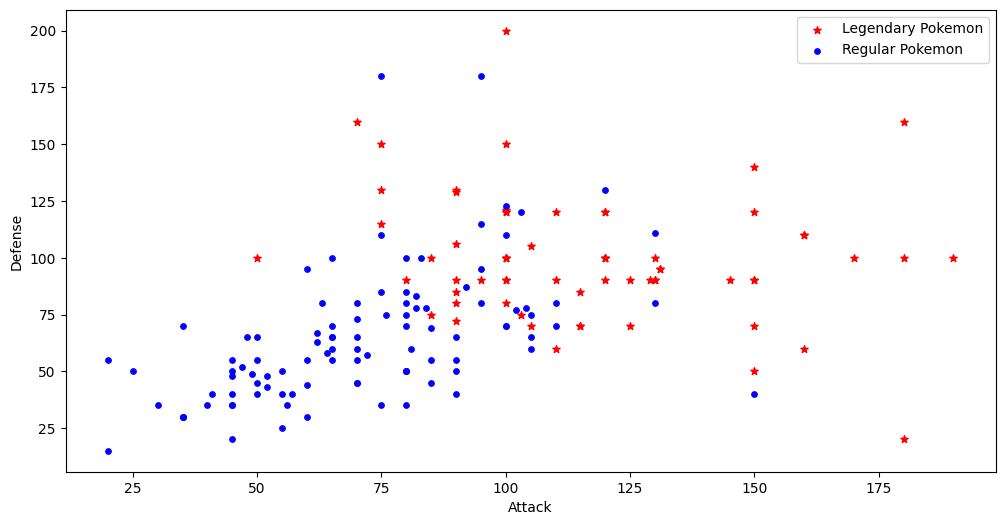

In [34]:
leg = pokemon[pokemon['LEGENDARY'] == True]
not_leg = pokemon[pokemon['LEGENDARY'] == False]
plt.scatter(leg.ATTACK, leg.DEFENSE, color='#FF0000', label='Legendary Pokemon', marker="*", s=30)
plt.scatter(not_leg.ATTACK.head(100), not_leg.DEFENSE.head(100), color='#0000FF', label='Regular Pokemon', s=15)
plt.xlabel("Attack")
plt.ylabel("Defense")
plt.legend()
plt.plot()
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

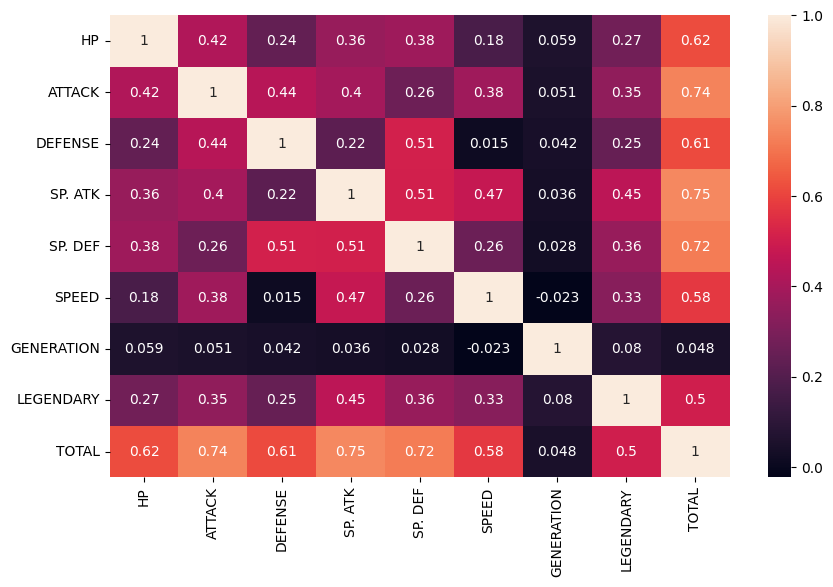

In [35]:
plt.figure(figsize=(10,6)) 
sns.heatmap(pokemon.corr(numeric_only = True),annot=True) 
plt.show()